In [1]:
# import the lib

import tensorflow as tf
import pandas as pd

import matplotlib.pyplot as plt


In [2]:
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
insurance["sex"]

0       female
1         male
2         male
3         male
4         male
         ...  
1333      male
1334    female
1335    female
1336    female
1337    female
Name: sex, Length: 1338, dtype: object

In [6]:
insurance["smoker"]

0       yes
1        no
2        no
3        no
4        no
       ... 
1333     no
1334     no
1335     no
1336     no
1337    yes
Name: smoker, Length: 1338, dtype: object

In [7]:
insurance["smoker"], insurance["age"]

(0       yes
 1        no
 2        no
 3        no
 4        no
        ... 
 1333     no
 1334     no
 1335     no
 1336     no
 1337    yes
 Name: smoker, Length: 1338, dtype: object,
 0       19
 1       18
 2       28
 3       33
 4       32
         ..
 1333    50
 1334    18
 1335    18
 1336    21
 1337    61
 Name: age, Length: 1338, dtype: int64)

In [8]:
# lets try one-hot encoding

insurance_one_hot= pd.get_dummies(insurance)
insurance_one_hot.head(10)

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
5,31,25.740,0,3756.62160,1,0,1,0,0,0,1,0
6,46,33.440,1,8240.58960,1,0,1,0,0,0,1,0
7,37,27.740,3,7281.50560,1,0,1,0,0,1,0,0
8,37,29.830,2,6406.41070,0,1,1,0,1,0,0,0
9,60,25.840,0,28923.13692,1,0,1,0,0,1,0,0


In [9]:
insurance.describe(include = 'all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


In [10]:
# create x and y (features and labels)


x = insurance_one_hot.drop("charges", axis= 1)


y  = insurance_one_hot["charges"]

print(x.head(5))


print(y.head(5))




   age     bmi  children  sex_female  sex_male  smoker_no  smoker_yes  \
0   19  27.900         0           1         0          0           1   
1   18  33.770         1           0         1          1           0   
2   28  33.000         3           0         1          1           0   
3   33  22.705         0           0         1          1           0   
4   32  28.880         0           0         1          1           0   

   region_northeast  region_northwest  region_southeast  region_southwest  
0                 0                 0                 0                 1  
1                 0                 0                 1                 0  
2                 0                 0                 1                 0  
3                 0                 1                 0                 0  
4                 0                 1                 0                 0  
0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype

In [11]:
# craete training and test sets


from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)

len(x), len(x_train), len(x_test)

(1338, 1070, 268)

In [13]:
# build a Neural Network (NN)


tf.random.set_seed(42)

#1. create  a model

insurance_model =  tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
    
    
])



#2. compile the model

insurance_model.compile(loss = tf.keras.losses.mae,
                       optimizer= tf.keras.optimizers.SGD(),
                        metrics=["mae"]
                       )

#3. fit the model

insurance_model.fit(x_train, y_train, epochs= 100)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 10200.7270 - mae: 10200.7270
Epoch 2/100
34/34 [==============================] - 0s 942us/step - loss: 7718.1923 - mae: 7718.1923
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 6983.7824 - mae: 6983.7824
Epoch 4/100
34/34 [==============================] - 0s 991us/step - loss: 8083.4828 - mae: 8083.4828
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 7793.8447 - mae: 7793.8447
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 7618.4111 - mae: 7618.4111
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 7678.4979 - mae: 7678.4979
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 7780.4291 - mae: 7780.4291
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7588.8135 - mae: 7588.8135
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 7520.6832 - mae: 752

In [14]:

# check the results on insurance model on test data


insurance_model.evaluate(x_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7023.3286 - mae: 7023.3286


[7023.32861328125, 7023.32861328125]

In [15]:
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364489)

In [16]:
# try to improve our model

#1. add an extra layer with hidden and try SGD and Adam
# 2. train for longer

# 3.  insert your own experiment

In [17]:
# set random seed

tf.random.set_seed(42)

#1. create  a model

insurance_model2 = tf.keras.Sequential([
    #tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
    
    
])



# 2. compile the model

insurance_model2.compile(loss = tf.keras.losses.mae,
                         optimizer = tf.keras.optimizers.SGD(),
                         metrics = ["mae"]
                        
                        )


# Fit the model

insurance_model2.fit(x_train, y_train, epochs = 100)

Epoch 1/100
34/34 [==============================] - 1s 1ms/step - loss: 10200.7270 - mae: 10200.7270
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 7718.1923 - mae: 7718.1923
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 6983.7824 - mae: 6983.7824
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 8083.4828 - mae: 8083.4828
Epoch 5/100
34/34 [==============================] - 0s 986us/step - loss: 7793.8447 - mae: 7793.8447
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 7618.4111 - mae: 7618.4111
Epoch 7/100
34/34 [==============================] - 0s 904us/step - loss: 7678.4979 - mae: 7678.4979
Epoch 8/100
34/34 [==============================] - 0s 1000us/step - loss: 7780.4291 - mae: 7780.4291
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 7588.8135 - mae: 7588.8135
Epoch 10/100
34/34 [==============================] - 0s 882us/step - loss: 7520.6832 - mae

In [20]:

# check the results on insurance model on test data


insurance_model2.evaluate(x_test, y_test)

9/9 [==============================] - 0s 748us/step - loss: 7023.3286 - mae: 7023.3286


[7023.32861328125, 7023.32861328125]

In [21]:
# set random seed

tf.random.set_seed(42)

#1. create  a model

insurance_model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
    
    
])



# 2. compile the model

insurance_model2.compile(loss = tf.keras.losses.mae,
                         optimizer = tf.keras.optimizers.Adam(),
                         metrics = ["mae"]
                        
                        )


# Fit the model

insurance_model2.fit(x_train, y_train, epochs = 100)

Epoch 1/100
34/34 [==============================] - 0s 770us/step - loss: 13251.7400 - mae: 13251.7400
Epoch 2/100
34/34 [==============================] - 0s 907us/step - loss: 12768.7726 - mae: 12768.7726
Epoch 3/100
34/34 [==============================] - 0s 997us/step - loss: 12248.2855 - mae: 12248.2855
Epoch 4/100
34/34 [==============================] - 0s 884us/step - loss: 12353.0241 - mae: 12353.0241
Epoch 5/100
34/34 [==============================] - 0s 867us/step - loss: 11243.3973 - mae: 11243.3973
Epoch 6/100
34/34 [==============================] - 0s 857us/step - loss: 9718.5255 - mae: 9718.5255
Epoch 7/100
34/34 [==============================] - 0s 893us/step - loss: 8354.8474 - mae: 8354.8474
Epoch 8/100
34/34 [==============================] - 0s 903us/step - loss: 7732.2963 - mae: 7732.2963
Epoch 9/100
34/34 [==============================] - 0s 883us/step - loss: 7537.6735 - mae: 7537.6735
Epoch 10/100
34/34 [==============================] - 0s 874us/step - lo

In [18]:
# check the results on insurance model on test data

print(insurance_model.evaluate(x_test, y_test))
print(insurance_model2.evaluate(x_test, y_test))

9/9 [==============================] - 0s 1ms/step - loss: 7023.3286 - mae: 7023.3286
[7023.32861328125, 7023.32861328125]
9/9 [==============================] - 0s 2ms/step - loss: 7023.3286 - mae: 7023.3286
[7023.32861328125, 7023.32861328125]


In [19]:
# set random seed

tf.random.set_seed(42)


#1 . create the model 

insurance_model3 = tf.keras.Sequential([
    
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])


# 2. compile the model

insurance_model3.compile(loss = tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.Adam(),
                         metrics=["mae"]
                        
                        )

#3. fit the model by giving epoch as 200

insurance_model3.fit(x_train, y_train, epochs = 200)

Epoch 1/200
34/34 [==============================] - 1s 2ms/step - loss: 13251.7400 - mae: 13251.7400
Epoch 2/200
34/34 [==============================] - 0s 2ms/step - loss: 12768.7726 - mae: 12768.7726
Epoch 3/200
34/34 [==============================] - 0s 2ms/step - loss: 12248.2855 - mae: 12248.2855
Epoch 4/200
34/34 [==============================] - 0s 1ms/step - loss: 12353.0241 - mae: 12353.0241
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 11243.3973 - mae: 11243.3973
Epoch 6/200
34/34 [==============================] - 0s 2ms/step - loss: 9718.5255 - mae: 9718.5255
Epoch 7/200
34/34 [==============================] - 0s 2ms/step - loss: 8354.8474 - mae: 8354.8474
Epoch 8/200
34/34 [==============================] - 0s 2ms/step - loss: 7732.2963 - mae: 7732.2963
Epoch 9/200
34/34 [==============================] - 0s 2ms/step - loss: 7537.6735 - mae: 7537.6735
Epoch 10/200
34/34 [==============================] - 0s 2ms/step - loss: 7652.7184 - mae:

In [20]:
insurance_model3.evaluate(x_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3488.7854 - mae: 3488.7856


[3488.785400390625, 3488.78564453125]

In [21]:
# check the results on insurance model on test data

print(insurance_model.evaluate(x_test, y_test))
print(insurance_model2.evaluate(x_test, y_test))
print(insurance_model3.evaluate(x_test, y_test))

9/9 [==============================] - 0s 3ms/step - loss: 7023.3286 - mae: 7023.3286
[7023.32861328125, 7023.32861328125]
9/9 [==============================] - 0s 3ms/step - loss: 7023.3286 - mae: 7023.3286
[7023.32861328125, 7023.32861328125]
9/9 [==============================] - 0s 2ms/step - loss: 3488.7854 - mae: 3488.7856
[3488.785400390625, 3488.78564453125]


In [22]:
# plot history

pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")
plt.legend()

NameError: name 'history' is not defined

## preprocessing data (normalization and Standardization )

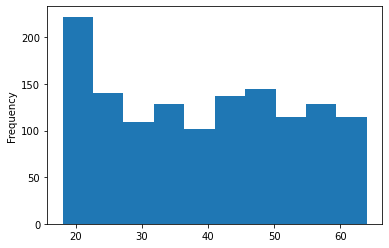

In [23]:
x["age"].plot(kind='hist')

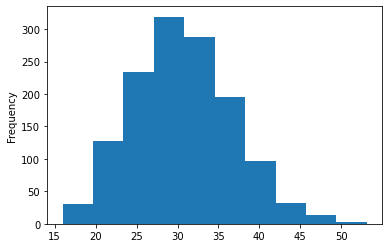

In [24]:
x["bmi"].plot(kind='hist')

In [25]:
x["children"].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [46]:
#  normalization &  standardization


import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt


insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [47]:
from sklearn.model_selection import train_test_split

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder



In [49]:
# """ # create a column transformer  """


ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children" ]),
    (OneHotEncoder(handle_unknown= "ignore"), ["sex", "smoker", "region"])


)


In [50]:
# create x and y


x = insurance.drop("charges", axis = 1)
y = insurance["charges"]


# build our train and test

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)


# fit the columns transformer to our training data
ct.fit(x_train)



# Treansform training and test data with normalization (MinMaxscalar) and ONeHotEncoder

x_train_normal = ct.transform(x_train)
x_test_normal =  ct.transform(x_test)



In [30]:

x_train_normal = ct.transform(x_train)


In [31]:
x_test_normal =  ct.transform(x_test)

IndexError: tuple index out of range

In [55]:
x_train_normal

array([[0.60869565, 0.10734463, 0.4       , ..., 1.        , 0.        ,
        0.        ],
       [0.63043478, 0.22491256, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.73913043, 0.23944041, 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.86956522, 0.24791499, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.41304348, 0.85122411, 0.4       , ..., 0.        , 0.        ,
        1.        ],
       [0.80434783, 0.37503363, 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [56]:
x_train_normal[70]

array([0.63043478, 0.54129674, 0.2       , 0.        , 1.        ,
       0.        , 1.        , 0.        , 0.        , 1.        ,
       0.        ])

In [57]:
x_train_normal.shape, x_train.shape

((1070, 11), (1070, 6))

In [51]:
x_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [58]:
# our data has been normalized and one hot encoded


# build a neural network to fit on our normalized data


tf.random.set_seed(42)

#1. create a model

insurance_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])


#2.. compile the model

insurance_model_4.compile(loss = tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.Adam(),
                         metrics=["mae"]         
                        )

#3. fit the model by giving epoch as 200

insurance_model_4.fit(x_train_normal, y_train, epochs = 100)

Epoch 1/100
34/34 [==============================] - 1s 1ms/step - loss: 13296.4671 - mae: 13296.4671
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 12948.4245 - mae: 12948.4245
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 12705.2201 - mae: 12705.2201
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 13369.7395 - mae: 13369.7395
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 13230.8567 - mae: 13230.8567
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 12995.1999 - mae: 12995.1999
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 12876.1059 - mae: 12876.1059
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 13004.0395 - mae: 13004.0395
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 12508.0465 - mae: 12508.0465
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 12304.99

In [59]:
insurance_model_4.evaluate(x_test_normal, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3438.7844 - mae: 3438.7844


[3438.784423828125, 3438.784423828125]

In [63]:
# check the results on insurance model on test data



print(insurance_model_4.evaluate(x_test_normal, y_test))

9/9 [==============================] - 0s 2ms/step - loss: 3438.7844 - mae: 3438.7844
[3438.784423828125, 3438.784423828125]


In [36]:
insurance_model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 10)                120       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


# Neural network Classification 